<a href="https://colab.research.google.com/github/humbertozanetti/estruturadedados/blob/main/Notebooks/Estrutura_de_Dados_Aula_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ESTRUTURA DE DADOS - AULA 04**
# **Prof. Dr. Humberto A. P. Zanetti**
# Fatec Deputado Ary Fossen - Jundiaí


---

**Conteúdo da aula:**
+ Pandas
  - Series
  - Dataframe



## **O que é Pandas?**
O Pandas é uma biblioteca de código aberto para manipulação e análise de dados em Python. Ele fornece estruturas de dados flexíveis e eficientes, especialmente projetadas para lidar com grandes volumes de dados de forma organizada.
Pandas tem uma extensa [documentação](https://pandas.pydata.org/docs/) e muita referência.

**Principais Características:**   
+ Fácil manipulação de tabelas e planilhas (semelhante ao Excel).
+ Suporte para importação e exportação de arquivos CSV, Excel, JSON e SQL.
+ Ferramentas poderosas para filtragem, agregação, ordenação e limpeza de dados.
+ Compatível com outras bibliotecas populares, como NumPy e Matplotlib.

## **O que é um Series?**

Um *Series* é uma estrutura de dados unidimensional da biblioteca Pandas, semelhante a um vetor ou uma lista em Python, mas com funcionalidades adicionais.
É composta por:
+ **Valores**: os dados propriamente ditos.
+ **Índices**: os rótulos associados a cada valor, similar às chaves de um dicionário.

**Quando Usar uma Series?**
+ Quando precisamos armazenar e manipular uma única sequência de valores.
+ Quando queremos realizar cálculos estatísticos rápidos.
+ Quando precisamos de um **dicionário avançado**, já que a Series combina chaves e valores.

## **O que é um DataFrame?**
Um DataFrame é uma estrutura de dados bidimensional da biblioteca Pandas, semelhante a uma tabela do Excel, um banco de dados ou uma planilha. Ele organiza os dados em linhas e colunas, permitindo a manipulação e análise de forma eficiente.  
Características principais de um DataFrame:  
+ **É bidimensional**: contém linhas e colunas organizadas.
+ **Cada coluna pode ter um tipo de dado diferente** (exemplo: números, textos, datas).
+ **Indexação flexível**: pode ter rótulos personalizados para linhas e colunas.
+ **Métodos poderosos para manipulação de dados**: filtragem, agregação, ordenação, estatísticas descritivas e muito mais.

**Series x Dataframes**

| Característica	| Series |	DataFrame |
| :----:  | :----:  | :----:  |
| Estrutura |	Unidimensional |	Bidimensional |
| Semelhante a |	Vetor/Lista	| Tabela |
| Índices |	Sim	| Sim |
| Colunas	| 1	| Múltiplas |

**Se o DataFrame é uma tabela, a Series é uma única coluna dessa tabela!**

## **Utilizando Series e Dataframe**

**Criando uma Series**

In [1]:
import pandas as pd

dados = [10, 20, 30, 40]
serie = pd.Series(dados)

print(serie)

0    10
1    20
2    30
3    40
dtype: int64


**Observações**:
+ Notem que assim como em NumPy, nossa "base" acaba sendo uma lista para a transformação.
+ É associado uma metadado dado chamado `dtype` com o valor `int64`, indicando que os valores são do tipo inteiro de 64 bits.

| Tipo Pandas   | Descrição                          | Tipo NumPy equivalente |
| :-----------: | :--------------------------------: | :--------------------: |
| `int64`     | Números inteiros                | `np.int64`       |
| `float64`   | Números de ponto flutuante      | `np.float64`     |
| `bool`      | Valores booleanos (`True`/`False`) | `np.bool_`   |
| `object`    | Texto ou valores mistos         | `np.object_`     |
| `category`  | Categorias otimizadas para memória | `np.object_` |
| `datetime64` | Datas e horários       | `np.timedelta64` |


O Pandas definie automaticamente o tipo pelo contexto.

In [2]:
import pandas as pd

s1 = pd.Series([1, 2, 3, 4])  # Inferido como int64
s2 = pd.Series([1.5, 2.7, 3.9])  # Inferido como float64
s3 = pd.Series(['a', 'b', 'c'])  # Inferido como object (texto)
s4 = pd.Series([True, False, True])  # Inferido como bool

print(s1.dtype)
print(s2.dtype)
print(s3.dtype)
print(s4.dtype)


int64
float64
object
bool


Mas também podemos redefinir, caso necessário:


In [ ]:
s = pd.Series([1, 2, 3], dtype='int32')
print(s.dtype)

Se o `dtype` estiver incorreto ou precisar de otimização, podemos convertê-lo usando `.astype()`:

In [ ]:
s = pd.Series([1, 2, 3])
s = s.astype('float32')
print(s.dtype)

**Trabalhando com tipos especiais (`datetime`, `category`)**  

**Datas**

In [3]:
s = pd.Series(['2024-03-01', '2024-03-02'])
s = pd.to_datetime(s)
print(s.dtype)

datetime64[ns]


**Category** (economiza memória e acelera operações em dados repetitivos)

In [4]:
s = pd.Series(['alto', 'médio', 'baixo', 'alto', 'médio'], dtype='category')
print(s.dtype)

category


## **Índices e Acessos em Series**

Como vimos, os índices são gerados automaticamente, mas podemos definir índices personalizados para os elementos:

In [5]:
serie = pd.Series([10, 20, 30, 40], index=['a', 'b', 'c', 'd'])
print(serie)

a    10
b    20
c    30
d    40
dtype: int64


Se criarmos uma Series a partir de um dicionário, as chaves se tornam os índices automaticamente:

In [6]:
dados = {'Betina': 6, 'Carlos': 25, 'Ana': 30}
serie = pd.Series(dados)

print(serie)

Betina     6
Carlos    25
Ana       30
dtype: int64


Acessamos valores pelos índices:

In [7]:
dados = {'Betina': 6, 'Carlos': 25, 'Ana': 30}
serie = pd.Series(dados)

# acessando apenas um valor
print('Valor do índice "Betina":', serie['Betina'])

# acessando vários valores
print(serie[['Carlos', 'Ana']])

# e podemos usar filtros
print(serie[serie > 10])

Valor do índice "Betina": 6
Carlos    25
Ana       30
dtype: int64
Carlos    25
Ana       30
dtype: int64


**Operações**

In [8]:
# dobrar os valores dentro da série
serie_dobro = serie * 2
print(serie_dobro)

print(serie.mean())   # Média
print(serie.sum())    # Soma
print(serie.max())    # Maior valor
print(serie.min())    # Menor valor

Betina    12
Carlos    50
Ana       60
dtype: int64
20.333333333333332
61
30
6


Veremos mais operações vetorizadas a seguir com Dataframes!

## **Trabalhando com DataFrame**

Podemos criar um DataFrame manualmente informando as colunas:

In [9]:
dados = [['Betina', 6, 'Itatiba'], ['Carlos', 25, 'Rio de Janeiro'], ['Ana', 30, 'Belo Horizonte']]
df = pd.DataFrame(dados, columns=['Nome', 'Idade', 'Cidade'])
print(df)

     Nome  Idade          Cidade
0  Betina      6         Itatiba
1  Carlos     25  Rio de Janeiro
2     Ana     30  Belo Horizonte


Cada **chave do dicionário** se torna um nome de coluna, e os **valores** são as linhas da tabela.

In [10]:
dados = {
    'Nome': ['Betina', 'Carlos', 'Ana'],
    'Idade': [6, 25, 30],
    'Cidade': ['Itatiba', 'Rio de Janeiro', 'Belo Horizonte']
}

df = pd.DataFrame(dados)
print(df)

     Nome  Idade          Cidade
0  Betina      6         Itatiba
1  Carlos     25  Rio de Janeiro
2     Ana     30  Belo Horizonte


Criando um DataFrame a partir de uma lista de listas:

In [11]:
dados = [['Betina', 6, 'Itatiba'], ['Carlos', 25, 'Rio de Janeiro'], ['Ana', 30, 'Belo Horizonte']]
df = pd.DataFrame(dados, columns=['Nome', 'Idade', 'Cidade'])
print(df)

     Nome  Idade          Cidade
0  Betina      6         Itatiba
1  Carlos     25  Rio de Janeiro
2     Ana     30  Belo Horizonte


## **Acessando os dados em DataFrames**

Selecionando uma coluna (que é uma Series):

In [12]:
print(df['Nome'])  # Retorna a coluna 'Nome' como uma Series

0    Betina
1    Carlos
2       Ana
Name: Nome, dtype: object


Selecionando várias colunas:

In [13]:
print(df[['Nome', 'Idade']])  # Retorna um DataFrame com as colunas escolhidas

     Nome  Idade
0  Betina      6
1  Carlos     25
2     Ana     30


Selecionando uma linha específica pelo índice:

In [14]:
print(df.loc[0])  # Acessa a primeira linha pelo índice
print(df.loc[1])  # Acessa a segunda linha pelo número da posição

Nome       Betina
Idade           6
Cidade    Itatiba
Name: 0, dtype: object
Nome              Carlos
Idade                 25
Cidade    Rio de Janeiro
Name: 1, dtype: object


E filtros:

In [15]:
df_maiores = df[df['Idade'] > 18]  # Retorna apenas as linhas onde a idade é maior que 18
print(df_maiores)

     Nome  Idade          Cidade
1  Carlos     25  Rio de Janeiro
2     Ana     30  Belo Horizonte


## **Modificando e adicionando dados**

Adicionando uma coluna nova:

In [18]:
df['Profissão'] = ['Estudante', 'Engenheiro', 'Médico']
print(df)

     Nome  Idade          Cidade   Profissão
0  Betina      6         Itatiba   Estudante
1  Carlos     25  Rio de Janeiro  Engenheiro
2     Ana     30  Belo Horizonte      Médico


Modificar valores:

In [19]:
df.loc[df['Nome'] == 'Carlos', 'Idade'] = 26  # Altera a idade de Carlos para 26
print(df)

     Nome  Idade          Cidade   Profissão
0  Betina      6         Itatiba   Estudante
1  Carlos     26  Rio de Janeiro  Engenheiro
2     Ana     30  Belo Horizonte      Médico


Remover uma coluna:

In [20]:
df = df.drop(columns=['Profissão'])
print(df)

     Nome  Idade          Cidade
0  Betina      6         Itatiba
1  Carlos     26  Rio de Janeiro
2     Ana     30  Belo Horizonte


Remover uma linha:

In [ ]:
df = df.drop(index=1) # ou apenas `df.drop(1)`
print(df)

## **Iterando valores em Series e Dataframes**

É possível utilizar laços para acessar os dados em Series ou Dataframes, mas sempre será **mais lento** que ações vetorizadas (como visto em NumPy).

**Percorrendo Series com `for`**

In [21]:
import pandas as pd

s = pd.Series([10, 20, 30, 40])

for valor in s:
    print(valor)


10
20
30
40


**Percorrendo DataFrame com `for`**

O `for` por padrão, irá percorrer os **nomes das colunas** e não os valores.

In [22]:
df = pd.DataFrame({
    'Nome': ['Ana', 'Carlos', 'Beatriz'],
    'Idade': [25, 30, 22]
})

for coluna in df:
    print(coluna)


Nome
Idade


**Percorrendo Linhas com `iterrows()`**  

Retorna cada linha como um par `(índice, Series)`, permitindo acessar os valores.

In [23]:
for indice, linha in df.iterrows():
    print(f"Nome: {linha['Nome']}, Idade: {linha['Idade']}")

Nome: Ana, Idade: 25
Nome: Carlos, Idade: 30
Nome: Beatriz, Idade: 22


**Percorrendo Linhas com `itertuples()` (Mais Eficiente!)**  

Cria tuplas nomeadas, preservando tipos e sendo mais rápido que `iterrows()`:

In [24]:
for linha in df.itertuples(index=False):
    print(f"Nome: {linha.Nome}, Idade: {linha.Idade}")

Nome: Ana, Idade: 25
Nome: Carlos, Idade: 30
Nome: Beatriz, Idade: 22


**Percorrendo Valores com `apply()`**

É a melhor abordagem para percorrer colunas e aplicar funções, se comparado ao `for`.

In [25]:
df['Idade'].apply(lambda x: print(f"Idade: {x}"))

Idade: 25
Idade: 30
Idade: 22


,Idade
0,None
1,None
2,None


## **Algumas operações vetorizadas**

Uma das vantagens de usar Pandas (assim como NumPy) é o uso de oprações vetorizadas, que produzem um trabalho mais rápido que no uso de laços de repetições e em armazenamento de memória.


**Operações matemáticas diretas**

As operações básicas são aplicadas diretamente sobre Series ou colunas de DataFrame (inclusive usando NumPy):

In [30]:
import pandas as pd
import numpy as np

df = pd.DataFrame({
    'A': [10, 20, 30],
    'B': [5, 10, 15]
})

df['Soma'] = df['A'] + df['B']
df['Produto'] = df['A'] * df['B']
df['Raiz_A'] = np.sqrt(df['A'])

print(df['Raiz_A'])


0    3.162278
1    4.472136
2    5.477226
Name: Raiz_A, dtype: float64


**Operações estatísticas**

In [31]:
print(df['A'].mean())   # Média
print(df['A'].sum())    # Soma total
print(df['A'].std())    # Desvio padrão
print(df['A'].min())    # Mínimo
print(df['A'].max())    # Máximo

20.0
60
10.0
10
30


**Filtros**

In [32]:
df_filtrado = df[df['A'] > 15]
print(df_filtrado)

    A   B  Soma  Produto    Raiz_A
1  20  10    30      200  4.472136
2  30  15    45      450  5.477226


**Aplicação de funções lambdas (`apply()`)**  

A função `apply()` permite aplicar funções a colunas ou linhas:

In [34]:
df['Dobro_A'] = df['A'].apply(lambda x: x * 2)

print(df['Dobro_A'])

0    20
1    40
2    60
Name: Dobro_A, dtype: int64


Caso precise trabalhar linha por linha, pode-se usa o parâmetro `axis`:

In [35]:
df['Soma_Linhas'] = df.apply(lambda row: row['A'] + row['B'], axis=1)

print(df['Soma_Linhas'])

0    15.0
1    30.0
2    45.0
Name: Soma_Linhas, dtype: float64


**Transformação e substituição de valores**

In [37]:
df['B'] = df['B'].replace({5: 50, 10: 100})  # Substitui valores específicos
df['A'] = df['A'].map(lambda x: x * 2)  # Multiplica por 2 cada valor de 'A'

print(df)

     A    B  Soma  Produto    Raiz_A  Dobro_A  Soma_Linhas
0   40   50    15       50  3.162278       20         15.0
1   80  100    30      200  4.472136       40         30.0
2  120   15    45      450  5.477226       60         45.0


**Manipulação de strings**  

Colunas com textos também suportam trabalos com vetorização

In [39]:
df_nomes = pd.DataFrame({'Nome': ['ana', 'CARLOS', 'Beatriz']})
df_nomes['Nome'] = df_nomes['Nome'].str.capitalize()  # Capitaliza os nomes

print(df_nomes)

      Nome
0      Ana
1   Carlos
2  Beatriz


# **Exemplo prático!**  

Vamos imaginar uma planilha com 4 notas, a qual gostaríamos de analisar algumas informações, como média da sala, maior nota, taxa de aprovação, etc.

Primeiro, vamos criar um arquivo .csv para manipular:

In [40]:
import pandas as pd

# Dicionário com os dados dos alunos
dados = {
    'Aluno': ['Ana', 'Carlos', 'Beatriz', 'Daniel', 'Eduarda'],
    'Nota1': [8.0, 5.5, 7.5, 9.0, 4.5],
    'Nota2': [7.5, 6.0, 8.5, 9.5, 5.0],
    'Nota3': [9.0, 5.0, 7.0, 8.0, 4.0],
    'Nota4': [6.5, 4.5, 8.0, 9.0, 3.5]
}

# criando um DataFrame
df = pd.DataFrame(dados)

# salvando como CSV
df.to_csv('notas_alunos.csv', index=False)
print('Arquivo CSV criado com sucesso!')


Arquivo CSV criado com sucesso!


Depois, vamos "consumir" esses dados e calcular média das notas, maior e menor nota, verificar quantos alunos foram aprovados e exibir as informações:

In [41]:
import pandas as pd

# lendo o arquivo
df = pd.read_csv('notas_alunos.csv')

# média de cada aluno
df['Média'] = df[['Nota1', 'Nota2', 'Nota3', 'Nota4']].mean(axis=1)

# Aprovação (média >= 6.0)
df['Situação'] = df['Média'].apply(lambda x: 'Aprovado' if x >= 6 else 'Reprovado')

# média geral da turma
media_geral = df['Média'].mean()

# maior e menor nota
maior_nota = df['Média'].max()
menor_nota = df['Média'].min()

# Nome dos alunos com maior e menor nota
aluno_maior_nota = df[df['Média'] == maior_nota]['Aluno'].values[0]
aluno_menor_nota = df[df['Média'] == menor_nota]['Aluno'].values[0]

# percentual de aprovação
percentual_aprovacao = (df[df['Situação'] == 'Aprovado'].shape[0] / df.shape[0]) * 100


print(df)
print('\n Média geral da turma:', round(media_geral, 2))
print(f' Maior nota: {maior_nota} - Aluno: {aluno_maior_nota}')
print(f' Menor nota: {menor_nota} - Aluno: {aluno_menor_nota}')
print(f' Percentual de aprovação: {percentual_aprovacao:.2f}%')


     Aluno  Nota1  Nota2  Nota3  Nota4  Média   Situação
0      Ana    8.0    7.5    9.0    6.5  7.750   Aprovado
1   Carlos    5.5    6.0    5.0    4.5  5.250  Reprovado
2  Beatriz    7.5    8.5    7.0    8.0  7.750   Aprovado
3   Daniel    9.0    9.5    8.0    9.0  8.875   Aprovado
4  Eduarda    4.5    5.0    4.0    3.5  4.250  Reprovado

 Média geral da turma: 6.78
 Maior nota: 8.875 - Aluno: Daniel
 Menor nota: 4.25 - Aluno: Eduarda
 Percentual de aprovação: 60.00%


# **EXTRA: Matplotlib**

O Matplotlib é uma biblioteca para visualização de dados em Python. Ele é amplamente utilizado para criar gráficos de linha, barras, dispersão, histogramas, gráficos de pizza e muito mais.

**Principais características:**
+ Suporte a vários tipos de gráficos
+ Personalização completa (cores, estilos, rótulos, legendas)
+ Facilidade de integração com Pandas e NumPy
+ Compatível com ambientes interativos tipo "notebooks" (como aqui no Colab!)

Além disso possui uma excelente [documentação](https://matplotlib.org/) e vasto número de exemplos na comunidade.

## Fundamentos da bilbioteca

O Matplotlib organiza os gráficos em uma estrutura hierárquica composta por Figura, Eixos e Eixos X e Y.

**Figura e Eixos**  
+ Figura (*Figure*): Representa toda a área do gráfico.
+ Eixos (*Axes*): Cada gráfico dentro da Figura.
+ Eixos X e Y (*Axis*): Representam os limites dos gráficos.
+ Estilos (*Styles*): Permite personalizar cores, legendas, rótulos e estilos de linha.
+ Plotagem (`plot()`): Método principal para desenhar gráficos de linha, dispersão e outros.

**Gráfico de linha**

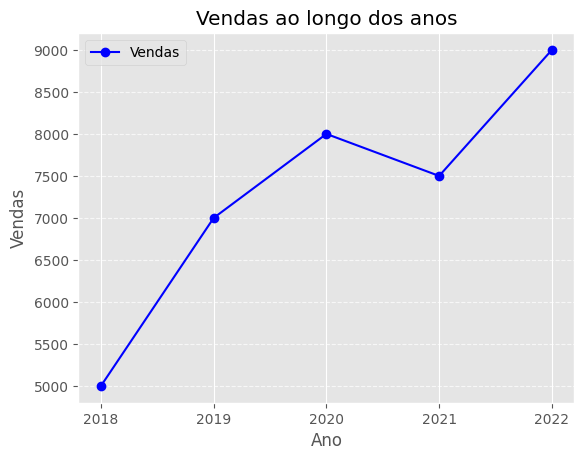

In [43]:
import matplotlib.pyplot as plt

# Dados
anos = [2018, 2019, 2020, 2021, 2022]
vendas = [5000, 7000, 8000, 7500, 9000]

# Criando o gráfico
plt.plot(anos, vendas, marker='o', linestyle='-', color='b', label='Vendas')

# Adicionando rótulos e título
plt.xlabel('Ano')
plt.ylabel('Vendas')
plt.title('Vendas ao longo dos anos')
plt.legend()
plt.style.use('ggplot') # outros estilos: seaborn, classic, bmh, fivethirtyeight
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.xticks(anos)

# Exibindo o gráfico
plt.show()


**Gráfico de barras**

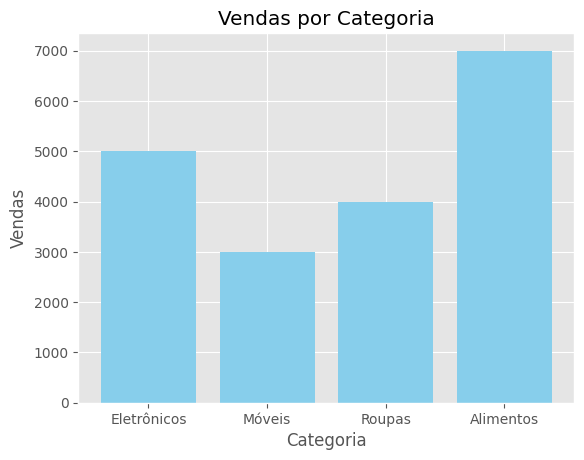

In [44]:
import matplotlib.pyplot as plt

categorias = ['Eletrônicos', 'Móveis', 'Roupas', 'Alimentos']
vendas = [5000, 3000, 4000, 7000]

plt.bar(categorias, vendas, color='skyblue')

plt.xlabel('Categoria')
plt.ylabel('Vendas')
plt.title('Vendas por Categoria')

plt.show()


**Gráfico de dispersão** (útil para visualizar a relação entre duas variáveis)

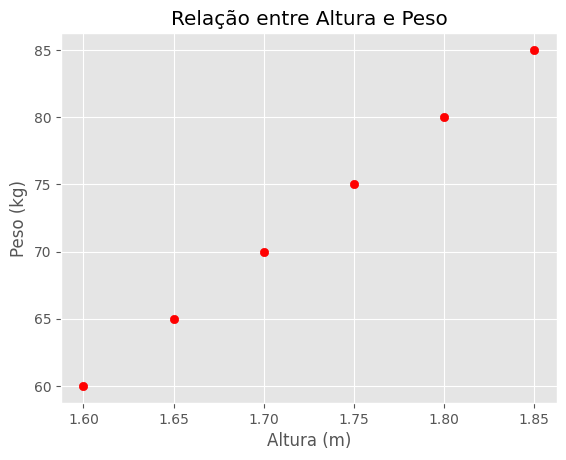

In [45]:
import matplotlib.pyplot as plt

altura = [1.60, 1.65, 1.70, 1.75, 1.80, 1.85]
peso = [60, 65, 70, 75, 80, 85]

plt.scatter(altura, peso, color='r')

plt.xlabel('Altura (m)')
plt.ylabel('Peso (kg)')
plt.title('Relação entre Altura e Peso')

plt.show()


**Histograma** (muito interessante para visualizar a distribuição de dados)

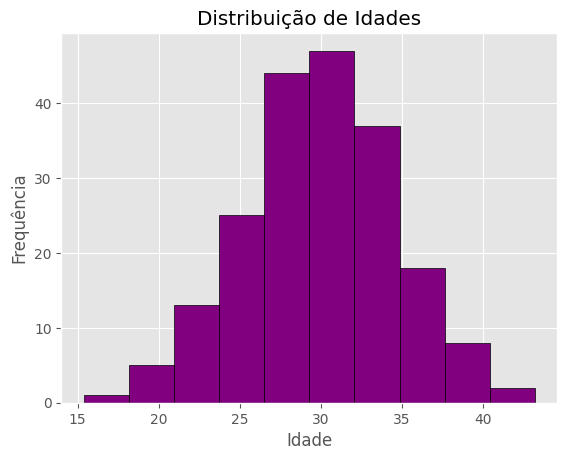

In [46]:
import numpy as np
import matplotlib.pyplot as plt

idades = np.random.normal(30, 5, 200)

plt.hist(idades, bins=10, color='purple', edgecolor='black')

plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.title('Distribuição de Idades')

plt.show()


**Gráfico de pizza**

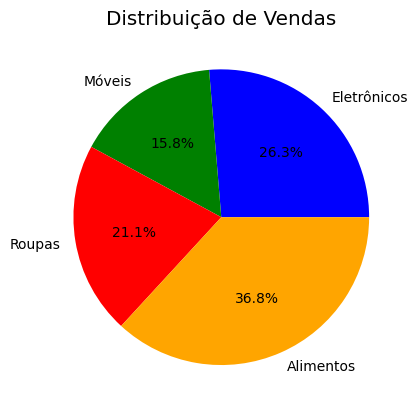

In [47]:
import matplotlib.pyplot as plt

categorias = ['Eletrônicos', 'Móveis', 'Roupas', 'Alimentos']
vendas = [5000, 3000, 4000, 7000]

plt.pie(vendas, labels=categorias, autopct='%1.1f%%', colors=['blue', 'green', 'red', 'orange'])

plt.title('Distribuição de Vendas')

plt.show()


**Múltiplos gráficos** (`subplots`)

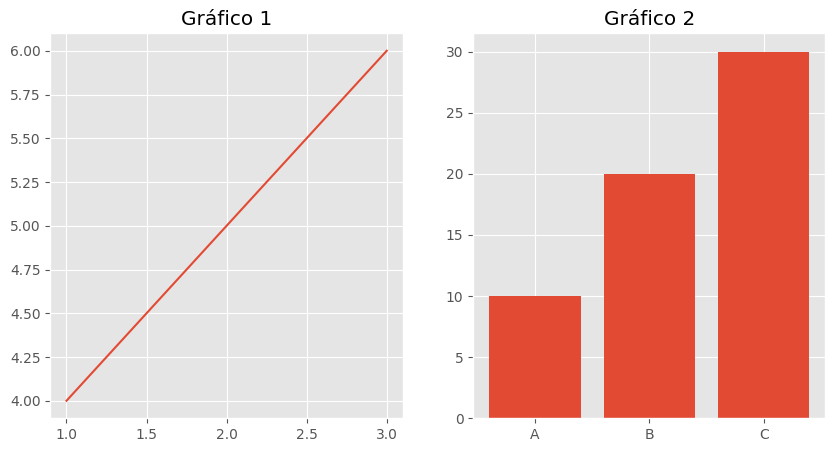

In [48]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Primeiro gráfico
axs[0].plot([1, 2, 3], [4, 5, 6])
axs[0].set_title('Gráfico 1')

# Segundo gráfico
axs[1].bar(['A', 'B', 'C'], [10, 20, 30])
axs[1].set_title('Gráfico 2')

plt.show()


## **Exemplo com Pandas**

In [49]:
import csv

dados = [
    ["produto", "categoria", "valor_venda"],
    ["Celular", "Eletrônicos", 1200],
    ["Notebook", "Eletrônicos", 3500],
    ["Fone de Ouvido", "Eletrônicos", 200],
    ["Geladeira", "Eletrodomésticos", 2500],
    ["Fogão", "Eletrodomésticos", 1800],
    ["Liquidificador", "Eletrodomésticos", 300],
    ["Camiseta", "Vestuário", 50],
    ["Calça Jeans", "Vestuário", 120],
    ["Tênis", "Vestuário", 250],
    ["Livro", "Papelaria", 40],
    ["Caderno", "Papelaria", 25],
    ["Caneta", "Papelaria", 5]
]

with open('vendas.csv', mode='w', newline='', encoding='utf-8') as arquivo:
    escritor = csv.writer(arquivo)
    escritor.writerows(dados)

print("Arquivo 'vendas.csv' criado com sucesso!")


Arquivo 'vendas.csv' criado com sucesso!


          produto         categoria  valor_venda
0         Celular       Eletrônicos         1200
1        Notebook       Eletrônicos         3500
2  Fone de Ouvido       Eletrônicos          200
3       Geladeira  Eletrodomésticos         2500
4           Fogão  Eletrodomésticos         1800


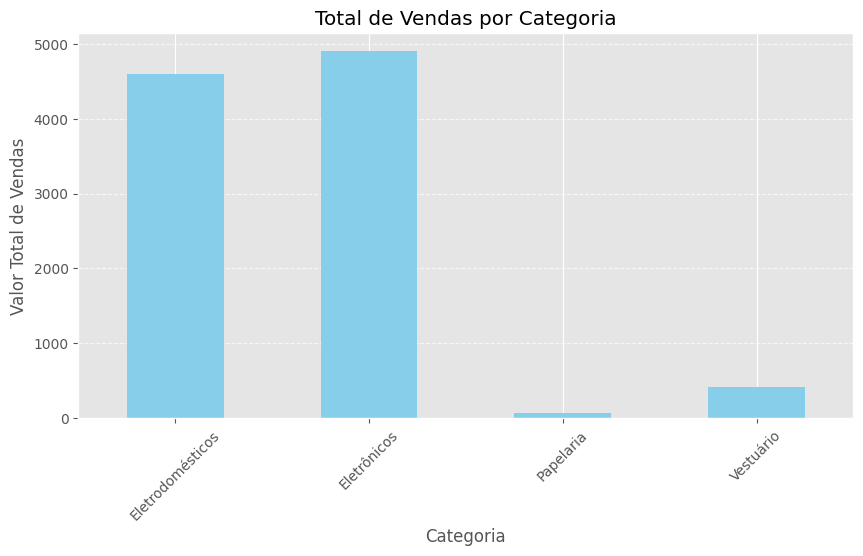

In [50]:
import pandas as pd
import matplotlib.pyplot as plt

# gerando o DataFrame a partir do CSV
df = pd.read_csv('vendas.csv')

# exibindo as 5 primeiras linhas
print(df.head())

# agrupando os dados por categoria e somando as vendas
vendas_por_categoria = df.groupby('categoria')['valor_venda'].sum()

# Criando gráfico de barras
plt.figure(figsize=(10, 5))
vendas_por_categoria.plot(kind='bar', color='skyblue')
plt.title('Total de Vendas por Categoria')
plt.xlabel('Categoria')
plt.ylabel('Valor Total de Vendas')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


## **Exercício**

Imagine que você recebeu um arquivo .csv com dados de vendas de uma pequena loja, e que necessita analisar esses dados para tomar algumas decisões. Dentre essas informações é preciso:
+ Média das vendas (valor médio de Total_Venda).
+ Maior e menor venda, incluindo qual produto teve essas vendas.
+ Percentual de produtos que venderam acima da média geral.

Para teste, use o seguinte dicionário para gerar o arquivo. csv:

```
dados_vendas = {
    'Produto': ['Notebook', 'Celular', 'Tablet', 'Monitor', 'Teclado'],
    'Quantidade': [10, 50, 30, 15, 40],
    'Preco_Unitario': [3000, 1500, 1200, 800, 200]
}
```

Crie também os seguintes gráficos:
+ Gráfico de Barras (Produto x Total de Venda):  o total vendido por produto e identificar facilmente o maior e menor valor.
+ Gráfico de pizza: qual produto representa maior ou menor parte do faturamento total da loja.
+ Gráfico de destaque (produtos acima da média): escolha um gráfico que mostre os produtos que venderam acima da média

